In [3]:
import pandas as pd
from io import BytesIO
import base64

encoded_string = "H4sIACEbPmcC/+2daXIcuZKE/9dZYDQvSRTF+19s9KYru7lUJnake6TTTDP1pJL6c6yBQETg169f779+/kD69c+Ht8eHt1//fPj1++fjw9vjw+v9/vjw4/3x4efr48PvP48Pf348Prw/vvz7x6/tw+M/8fsntg+/Hx9et++8br/ze/vrG8bvt+2Ptn/57ce/Hx7fefv5Y/vwun14gL29br+z/YNvb9tff9u+8+eB8fb++Hf+bJL/3B//9T8/H9/587p95/Xx1//8fvwn/rxtf/S2/c774zvv+LF9ePzR+/3xD75vct43Fe8b/PuvR4u9//73w8/tw6NV3zc572+P3nn/s33nz/bvvP+j4hX3H48PjwHw98P2Rz+333n8J/5+2P7obftbf94fHx598ffD48v3h67X+6O7/354fPn+c/vOQ87rffvr90f7vP7A43d+3LF9ePzXf/x4/Nd//N6+/Lb90Z/X7cPjP/rj0YOvP/H4zs9HV/798PjrP39t3/m1/c77r+3D43d+3d+2Dw8VvzYVf2fI9mH78uv2R6/b33rd/tbvx7/86w3bh+07W2P+2v7rrxvz60b4+pgOfz9sf/To5dfXTenr9td/4/Ev/96Yf29N93tr+d+/fm4ffm8fHip+b827zbi/k/vx19/w+E+83bcP2/h528bP29bdbz8fGG8b/NvWCNvU+yvi0XF/tn7/gwfYNuNe/2yt+ucx+P9+ePwn/jwm7Os2m/5+ePzR+9bL7z+272wDcptfr9v8+tty9+3D9p3X7R/c4LcZ9/r+9u+HB+H71oPvj1nwG9g+PEbd3w9vjw8Pnr8ftt95zLjf+PXjdn9B+t8v5h9DXg8ShhwEacI+QuNdYsFxL3fggb4BobJcy5gQ5KBynLZ2bIEb0pCG9OZoTm/ic2xgekh3t0+17uWAlrmHYvyZ4nX7Qo0JXy5chNBT+2rHBH5CeEwa0qZ44B3HBrl3bU+ZwtFoR653Q/e4D4neDT1fzGlOc5rTFpEhDWlIQxrSkIY0pCENaUhDGtKQhjSkIQ1pyENIlTgrB96Y0IQFhFCJQYUhB0GasI/QeCNMHV/I2r41ZOyTgiFtQHpPjHOytok7bDR+NC94u93WmjnNaU5aTiikk7h0w2VOPT7yXG4JMuQlIOHaLBfk9K3T1aw1r5aGtFVZuwQ5n9pjkonQ59nLtKFntM8O5vR2w3AKc3df5UhrA8NWkCeLR+MJ3e1m9D7olmyBhOPrfARj5IQf+PAO7okTzS1g19/giePZfRlbyGaGz2WckAIT3IcIc7LOnY/nHZHsJ6+Z3iXdmKE54QPviOXd/mpDGtKQXiGlCT0aLwXpXXsEpG9vfRAjNcvd3R6TdGPSzeiJY8ig1ppntyeOe7yPk5vV1xCeR27Ma+zmHpbe0A1pS9gt6SXIjelhaU5zmtOc5jSnOc3pQ6UhDWlIQxrSkIY0pDqkn+8cBWlCE5rQhPMJ4QdrBkJyExovMJ5N2Qt1tJfrCyzXntE+93nKNI1GX2x5antqezc0ZIBF0ov5lSD510n3tQekCW1aGNL2jzk9Mg3J6xZQKSNsG6OLMHkx96ZjSEN6nXRfG9KQV94W3ZLmNKc5zWlOc5rTnOY0pznNac7rcsIObUMa0pCGNKQhDWlIQxrSkIY0pCENaUhDGtKQhjSkIQ1pSEMa8mRIpRwu55oZ0pD1kCY0oQlNOJ/Qxa4NyQhpQhOaMEeYPoacUuN+RmXm1AB9lGTn5lR5IMCB5WM5DWlIQxrSkOKQEMkSslP3Gp6B9Nk6J7d+bV5OOE08639ScNvtl4V0UawR+9HdnupRAxLeg8zpVd2QPmXEgHR3exP3mDSkIYOsk9yEWtfiHo3X2BANeZkB6UP3xczylNLHNCKFOx97hy7OSQ9pw8PmpSEjQdpReZ0jD7xlX5bTF7jefQxpSEMa0pCGvLB5CQdYXoLQ7qDYeA5rMaQhDWnIWDakjYohfW1Pmq1cE3oN9+Kj2phJJFPdCaGePm5MG0Lubhsbhtw51fotAw9LD0vvOx6WUYalF6JLHiXIC1A7gNac5jSnOc1pTnOa05zmNKc5zTmTE+a8nj/EkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCGNKQhDWlIQxrSkIY0pCENaUhDGtKQhjRkMaQrrI7nNKQhDWnIkyBNGJ0QSk9k0kPCkIY0ZD2kCU1owhzhv0dXbtQPpUGpQR+c3C0p0YzsbWi8riOMM1LHcxrSkEyQLrc48sDFnsftg6FNC2/Z5vSeqL3XmHCEB4B+N/xW4lXiyRUXtDGkV/WGNdN3nT7j+BBR18s2eq8G6R53YxrSkDbV5CHtYbvo9LHp29nL8KwxpzmHcNpXaUhDGvI8SBP2m5QKFhH8buxV926F+2av6l7VvRbFHZC+L7tgY/oqvJswJchEi3nvdjO6GYMtj1C6yCNPUrYX3ZzmNKc5zWlOc5rTnOY0pznNOZMT5jSnObs508fLF27nmO/TDWlIQxrSkIY0pCENaUhDGvIMSL9TNp7TkJeBNKEJzyaEiM9fqpiba1ZfCdKEfYRJLJXP17hjOV0s4kqQJryGwaYBKfO8WlLwY/iZDHN6c+yAtG/N08ecXo4M6YV9/bECrsDsiWNIQ567TvqmftBSaSvdnOb0wu4eN6c5PdPXQHITJvdyfxtqTGxvjlfldPTvkPMjfTP6hGtOc16G04GChjRkQEg7qy9n/dovdJmjxNMyU9xt664fdUATKF8Pr5lzOOl5TWta05r2kJY+6eYZsA6tCCq+lEhVYk6mvawNZk5zmtOc5jSnOc1pTnOa05zmNKc5zWlOc5rTnOY0pznNaU5zmtOc5jSnOc1pTnOa05zmNKc5zWlOc5rTnOY0Z3ROmNOc5rwM57cCBRAoUIAnRRVoF9jv2AKjIhnSkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCGNKQhDWlIQxrSkIY0pCENacjhkJAqJQ2p8raQCNm5KdTlNqc5zWlOc5rTnOZk4IQ5h3Ia0pCGNKQh9yGTwjNPCs1owtiE0HkZDSrPzX1GNef1OA05AlLhUKbGacjLQJrQhGcTSuza/9Vh0HjR+JZEnl1O6dszxnfmVv1ESn2o9NPbk1H9MLQ5zWlOc5rTnOY0pznNaU5zmtOc5jQnK6dc4V9+p2O+8C9roz8n5x8bEgPYkIY0pCENaUhDGvJykM4WHM/59Rc9sESrGtKQTJDchJAqofPZs8HvrrtBZEtyDsI1OdPnR9mYOcmb0XjdhyCRwmi+yTKnOa/FKXPTakhDGrLejaCwEP3/z30nJIFyhbpJnNKlE828y5vTnOY0pznNaU5zmtOc5jSnOc1pTnOaMzonzDmUU+TpN9nUQokxYEhDGtKQhtSGdObOeE5D9kL6OYY5nPSQStkQ5hzLSQ2ZpNwyd7Xy3ToJry6ObU5zmtOc5jRnM6dTZgxpyD7L08uROc1pTnOa05w2j8+xl56lnJI2s4aZB6HrzpJfIB8MR780W97Yq7AhOU6g9GCByrupBjZwSGDwvwMeDJvY+r8pDWfTmta0po1EC60D1GX4Db8aPhl7ATYETOksvFibJwMb+Pv0E1s9yNt6lxnCloma90DicSsDrwY2rWlNa1rTmta0pjWtaU1r2hytUY1q1KGokLohhfIlF0SuWw6wpQaJaU1rWtOK5VMbdQaqWmbKc3iNpsZOqIZEUwtaaEl3YCtZ89+zjOWAJQazOc1pTnOa05zmNKc5zWlOc5rTnOY0pznNaU5zmtOc5jSnOc1pTnOa05zmNKc5zWlOc5rTnOY0pznNaU5zmtOc5jSnOc1pTnOa05zmNKc5zWlOc5rTnOY0pznNaU5zmtOc5jSnOc1pTnOa8yxOiNQcvSnVzP5MmzTezP7C/KykOsiLMUJo0pnTnOY0JxOnzOMfX5k1rJjnzEmGFoKjQsKmTSnJVerWWNAMaUhDGtKQhjSkIQ1pyEbIZ08vKRnt2Hl4kvy8jJ33SdWYpYA1aJM5zWlOcxJxwpxDOYW2pKT2hvrt83VJzrBlVHITuF4z5AUhJTYsekgILUUZbK1GNu0cWnpvwDNgfjfGU2ydRhZB/ddK3HMjgtq1eINIbLYa57NuF1jwblC4eoBQkL46rQgqpBoWWg0rgmrO63Gy+2yznkNmX6jQofKpDa5DK4KqO3oVWjhJXZRIHMcMaUhKyL0QLt5U6EO3BrixucfD3qpPHIWYlJzLtwQdO/aJQ4PdZyhxYPzYoAKrVvG5UeRM2ahIv1+EJcjOC01yQWxINrjism/mNcwGNrAyMJSAwe/0eMos46bN8Ku0edIY0gIxgfuxajLAIoMhwPF2+9F2QeyISiKNb05zmjM2J2R9WbHIk5mnMxvYwAZeCKxDa1SjGnUoKvTuGYUi4naZZYChsWEckEs1tQ6tUUej/v/P3pUdMinDNCP9mSiVxjenOc1pThLObT/AsxtDbmyJtjXkJSAh4/O6JblzuZnN3MIMIWYItjO/MwE6zlJBVJX5doAt1c4QWh+gEgq+l0jOn1UEnfdiAgAnow5GTUnhNhAizhxzmtOc5jSnOc1Zx2nIEZBJMAg/STk5k06GtY638Ja+v6GgwKnSnkUZmmQPUnx7gEmjsJXCHmFCE5rQhCY0oQlNaEITmtCEJjShCT8SQrbIcCxyjRGiMJIhOx4gVOV0B1tneNBnVUOnDoNRZ6NKhBNDJC1RiZP+Up7+WdIxD8zQ7sszBAbru1ijMYAchOsg/UXPEizBEkJIMP85/M+y+ziz/EoUkSfRlUgQPY8Y29jGNraxjW1sYxvb2MY2tj62mc1s5vOYcfBZT4Vo4wtiQxPbzPOZDWxgZWBoWtRQbGcDzwQuf5BdSYtQ+4sMo31+rdY2rWlNa1rTmta0pjWtaWPQQj8+GZqXlQGw1ZihP8hF3tA5kiA1bFJVhpmAHJXG336OMh9K/4xXnVBHkKOiIVOG7r45J0qtI9CR8n5nTXuH4DU6pA4mULMWoLNOpt3MO35ylRY259U4obKZVfJD56QMzdj1QNjQxFZjNvBMYNOaVo0WT06l3DU1vqrAjqubv/3xMYxQZAeE1AjXo937JWJF07+9vgesQZvMeTlOQxrSkBEhEanC80BdsXoK/BnLLTIDzClxCar8lIZXCbyWr6RWkWKPiG7uxja2sY1tbB1saGKb2cxmPo9ZZxUsVYFMSpGWotydG22cP4rCBUVcIXWiRPvC2HOxZZbaEiGC7a/GbGADG9jAgYCh6WP59gQdhO4joDhIDDwTuPDwRX4qy6jT6gvTmta0pjWtaU1rWtOa1rSmDUJbUoSDNN0tJ0foNgSCgQo4SAhX4k9P02Wp650eyxEaP9C7uITU8v5ldJO29Q55NtaGP+dLZKhAPIGwTJFoRwhiQw9bJRAFalfMkKnQtUeu085QGxjgBz/ClmpnHdqkNB6S2madPvzvo+h1cgkqTW3OMZwl6eiq/Jotb2xjE7+BY2ZWZo1qq0fkxl6FjQN/zV0h1xJqeQHQeRUnIHYy8ETgDz8oKJ7MdW9WIEqrC0xrWtOa1rSmNa1pTbuAFpp+RWi6MqB26kdFbSviW0KJy+8wwP/83BWeHzqWoNDgIqixYkrRWA5QSA4OkjpoZZWIEpwsZp7PLAUslCkTBFtqePxrf90rSwmTTIRDXRK9IHishl7CrMo6fsSssDbu8QuYuUX8SmNGajOSBDataU1rWtOaVpU2SdnDSaZVzXk1TkMa0pCGNKQ4pAlNeDZhSxQEb3qnFZFnZpfKYT0slvALzXSddYk+TlWgIPExsMBggOaMM/aZ2FJXw5sQFASiahkwpYrAu+mj9MkzRX7eSR0M+8PPvwOHslB6hRCJxofqsWmEKME+Yo7dKuWXhBeoxh9cAvS2tg9bmtYiWyBKrhc0gCUE7MFrNbVpTWta0961imzg4E03aGHrjA0RVMS4CT2qHctbfxhqL/6EAGbPDpMpLBSANleLWkgCdIwQqIQiYGdYaG0rIs9vCVQ/kuRsvQUPIIfXgV2rSHGAiR4siqRpTnlBbAH3dk6CWrMrPDhfwk/ukimRIDpyxLCTgScCQ3NgQK2dTWtaNVpoGqjQ3O+gUasTUoW7n3nX7gWBdWxD/qsWaJ4fA2Cjxn+ipUivI5SYk2mn0EJzPZF7ULdUCBTyAqB5P6tV272EXBBbjdnAM4GhmZJT+it340PYdyUyBQeYGrOBZwKb1rSmnUX7vx/dQmq8PzfNhi2Elxs2ZYqEegFizLkbN2p/8hM62dojQmUDix4LJS4zpZGf9A9qnLKk1XLUu0ONv/QBeD1FAhe/WS2KC5QasxSwShWvw/hrlQaHRMK4UK2Mw0IZ9GdwFCSTEV/BHG7zzAOmxxrmNF3QoILbGEOlGsIlNatFcY6Y2cxCTg+VOjKfgAM9i7OrCyLjXKIA0aGLQiiEJKvlnx/defGvwP9+QF9BInUvRtT3hlYnt6F0i0HF70fQG2g9sRZrmakFsaZMshAiIfoqkk5kWLNA1T7iTvKp0xJj7ifl4WR4wxve8IaPC69rkpdphESAfZsWwSGnETFSpmX7Tu7ORUtRSkUBIxBzkCbNJVoQG4H8hIrtr8YMsYCuyu255TZKTaNYBwlOEOYC6anYHykLD1V4sQFTtVJqKJLrAgMb2MAGNrCBDWzgqwAjSgwSJOoJHfOjI55XQx19Qd5jCXJTWwrYtKY17UxaRIk6RuFtu8LVm04Bjzp+wxu+Ah7q8FCEh1Kq9LEcfL1Swc6FXElYFkgjfFBYnU9p42MuoHRMLmX4QXmngFpr69Aa1agKqBhU6SCGOsWe0hpjMpMCO5s8NBzsEnU0j7GlhooGrcKuNKJiHe/9HaR2oXp+SXgJRxPUIiIgdZujRyu1V0Jg90GUUkJQTjOHZg4j1ILW5IFzecZCZQdyT09odAqURhGUgFvPRKxegDHqBDqLe2j9+6NSQ4P15/ZvKwYtAD1HIGNh/H6liNqV4PVCtIlKsmWK6/QqLO+CZ9bw5K1/LieQ1esOrfoF5fBlp3bal3KPBUpUtsFLeeFnMBdgKZej8GKR3CNuBjawgRmAUbGbCsjRanwd2tpDo5gcKBldYI9vP8bO2Yp3rSEEzdStHjlRtMgIkdsmDGxgZWCQB2o/JxexJ6ETs/IcXirZfw9+93V64p0yo0hl8NPH38oDi6yEj59svXi+zBSI5AepcULNlwgpdxZiHd6htANCzVVu4JXAUASGgQ0s4pX/wjwr7phn8enTSxyygsyrZULpD+COEC4DhmKxmOdyEGt2oCI+jW23yStSmCPQT9FCpnAl9GIhanuIf4yROx90NriIiWijpYXpr0hjL4oWC2ESAgshEyIz/no0DilqJylceYgefT93UtBRyv6qi+iSWMfPmnyqNssryAWxEcRmljssSwGXZu+y+iAPpBXNCIU+eu5VRENMC6tAqSlj2jm0OAjCp03baXtOiWpuPhFSexXIfQVSKbD0goSzEJnu04TZ1/HuOlGa2afx9BY31Pjg5ITozAj+DR2yx/+WyB7uafBEoNqLIgcSNOZCTbYd557wRdSOFcvZCwhxDfE9hqT0zM8WjvRFFJSLNmhl4nTV8FXWAnLrtLUsb/HpiHFSVWgvdVCTLXGyr+oEJUfD9TyptJoJz77i0ad6VWdIKOw1kJ3aKIy9Zy1ZlhVCG9t++3zuCxCxe3lF6PjFrRSZ0LW7xo4vU1Mtw5xb7CSFqNxGHXkgSTMKd8hR4DbiVSF3rjrgF901dnUhgEPsqJ/U++1A5tMjMfs8EryKO1BRooheCHF6w0fs4U8qEmZORU1DHvo4JOdSXaNUKd+lVJfgovHfT8+wPK+fchrR4AVh7jteV3lTGLHWgv5VKRqmC11h7bTrJ1PLI6ONzz4ERoV/g/UEWjUTwDyE0JgpB37rpSbElXGyIFR47jhdwbopiBz66cNcU/Ajc613Nmd8Uej9KlChiPet9qSovEhPEQvmQ810pcFkhpiSdLZ4l6IYS6W+CkuwBEuQOGU36wrQNZZgCZaApLQkjxWo22XqQ06YH6qHxmqlst0EDd+yXtnUC5DTFzpO1fEGJcEvYp46Nd94thyMlFmCgVujmEwIWS81ueJ8MSa70hDRYw+1W7+SmCU+YU/loMOkpKq1UKxOYIzl3tykjYUrjh1TOAjrZVymbAJyLnZPRI7ETkH4Y87JnAhx2Y3O8w2tqNKUbu6ukSrGUCaBeV73RGGKyxHsETQ6ACUEch8wW1SIrGWHuloKkUqIKql3QPo2VjpcDDK9IlYf7KnknJnDvrZ/Z5WbSlWLA7G1AMmLziMnrRg2Ktdj7hIZalXvD8jJPRL76yYhMK6Rg4MQaRGtDxEQloAoqpPC3ztZOfy5lk8lqFYfbUuf/ub05l8mbl9PTb3VlMijZfCi9sRkUrmGLWIuefaJVcssGyeIzEC9hhhyDvcjZN6vPq1LmyVD4UJTqHDGLrOuRde7xoF5OJWU9eI8kF6hMst4sWF6UH00ik8oZf4Aa9p/O2ZttgrJwalOMuv1pW5iaZis0uIALbFFOi+Q1aWzT66X3TAkD57cvZktIAmFFbjkVvzOP8Z0UlDy/JrPZh3r+vBH7IGLVSlB7E+Y7cgRciWFK+WtHdnQpkJ5XCnprFO34xeH5q16UbIDpKdV6aOAnPnmh45ysc0o93w0o+n8XEVNWOydNZi8KbOEMf5B09h8LkHVn49JfgtKL9kIsXrdB+0w6X2xgq7CkmM2pw+tN8qBXI5MRlNeAl7k6jKUixIxCYJI2JPDzkz28x/kdYKRQj6CNVwg23VGvPixRnIFH6D2M2t9co6MaDJPYNXT66x7VmkhEO4qwU9ESb4undqrAlBGm6fnPjRkrgJyg47PKIrlfeqSQ/cmfaMuxsUhQvJ6Rg4G/iKTicLq2seFkUhFie9TtbeI1GWpUpHfMJsuQK9IubRgeJ/RKqXRe9MClQVanYY61jovMzQSFgkcoC7Q5l4VfETVJiNbIFCHKo7ucdoj9aO2Fj6P1tUkgDcgr1uXcNcQB4i3yEnKfSEJj+iH396UHp4Xp0eolh2fspMLQUyyo2B3VS1ygwqx/AmIdZoekfwSWKZmJ0Jo+h1prA8h6fYCymgX2AU0S9OWKiqJMBEImKli3590fEqfaUTnoYp7a4Cy6YiKmNU7dZD0V3WoKO7+dYDVlpY6uyWeacfBllD6hCTnpBPNTGRdsbPYuEBoEwoWcy0PWom6mhWfYoDmRKHwBWPWKSa5rJWY5V/mQ8700BB1XMW0NWz8nDY40l7zXCt/FFZRHVoFG+NIVM1AI/SdiofAWwvdnrWn4vMP76o17Hk9YWl6EQi3Z4NrTPgk+AQK3QGM14LCkyKlQKnamyN8Et+E8YZvjxFO2YO1td/4VHQt2/RLRJjFPEJ2RkrVqU+gP4yn1BxHTh1rWqAr52HhcyPviKqNF9G4KxggPOd2l8hxO9BO65FO+SvgkgtwyqXyyJNXGkhCLSpXi01iUyvesLQqo+YM99L7NwoTq1AX8yoXsuxIr8bSO/xQAnWHJfnBv1VaiT9QQZfCuw85LdDyKfGuXPXYJVX/qK6m9kS1lM1j7aDa6rS0ZnaVGk6f3qH/Bw2Dj0ia2jM1JfwtWeLgM2PEgoO+8Q+JhbiLOeJS14PXfKv34eSiPYt/UxGzxOm+zJpgeBBdquUV4TjIpvRa6sSh+lyjZvzhdy1ouH0RqYzwXKx+nfjvuob0UC6tjUfp0Z5GaVmNyfjiU1SbxsDqqXvI6bIDc23AITOcUTVaI+gmWm+X6PXws0aAdBRgjyLG7az4CThm0zdVPa5D0BU1EnQ7oiSCT+kEdqQXGWf7U0NC8RRT0gg9L8pLRDw2nUFZrvGeaQkSIDNcWpRuGjUjBeXrzzVxCWr83PUph8oZW9kcp54rm4PoJAZnvuYhtQSIrw+lth1LCki3KPZOwYRfZDKhbx6gMuj3TnVc2pVW6qa584afFTkuZXbM2iq6SU9CvngaT4mxYoG1t9mkHgYUpDIf5RgeLX/nGNndMsHs7EJFTHfpsOUJZchKVg+eORQoFsq1q6Vm7LFnKT4VBbHbn0pp1HeoT1VMD9UldixHvfvQDVUbJyfGRLOKtSoQdOLjpbxO1unBS33SID3wUNg5eClLTD+5ik95I8yOHFlvgY3VjsLEnJMszXqxeJmTksgX+5q6tSXFUJ26pmB977dchdyNc1fFTMp4t36Z7Cd08pSVvBBkvOStyQGE3tfiGIKSDr4zWOfPZUIy1LJci97C3lsUgdTjWqUrCfTL7F/BJKt2JeNQDOn3brLLwS6qvks+fcj9a7y6OCdO20DSKGlaKvmokOFnUr51skQjIiyGMmXdc/wlQQSM/DMyI7nVyVh1M0VxKxIPoN+TWVVtn2Hh2BVS4h3bi/6lL5lyqLrEN8a4zkuHHRZbp6UPXZfaT8sbpVx+bWYBX1nUKmml+W1nzcFjdd22OqMZlpeMCffmJ61T+2JrLWdQ+XT2dfWZ/6MqPOvJH1HjWrXr+WvjNAgktIWmFkw/2aztUH1FyV3DYfk471YqMxNJU2mqzhLcruOUqmLH84Wdia6ki08OJZl4dF1WEknOujsXSKstlpnL1qUUWCOSbt0Qe74wHPne3Sw3ec0rUtTDHoRPFBZit4QLsr631ChZqZuQyRO7s0+TltwCmhiGSRoFQjqnapQXKDvjKNe9U8tTLFpAV8hnTWwfrR3ct7H1r6WXB/sSxHj0CBdcf9SYR8QiMmkcdQXO1HdYeBPKlhu+rgU0+lqzBEJWMqJefA/JuUx0y9GIUgAgXGZn/VrvSzpSGijjoEnOyUfcIVrQ8B0mjbMeZl3er4dKcwo5DwsKSfVV/GE8kJO8XzHVMfnGUxpu0otLA6ctMfTExa5r7Jzj0gjBFeRYHV5Ya1218WOSX4Mlqn/imfJOZeVGeGxrroHF42AcJJDNKi6qkEy5KmYzSaFpExZMfL1jWkZyuJcyavXO2tJpxeKlPCOi5qFDziGNQcfXXKudrxoNA/rcWqwlikZF7LItzD3aFX2AqTmjtjdRVUKvcjH8gZKFRyyv7dslE9cZqK09V1NuiEGvaO7ksRBkHlOiFnLiTzFn6RMHoLzhr5ZZ89YYeabYZzOq9GkGoqdPKlTQu2pDSICkHVQlbcSLJ6fedBUpLakx0Fqdk1RmaQdTTjr6m6qsCoFrmxIVqgnlBdJGvOlHlbsyWHLnE4cnpa0sbASimU2kWm5qW2wUsRjowrxEz6bYMnnOINZ41zwmW5RQhdhR6lKMzkrqQk44Eg9SwejM7D/BQtlQPCpJptBZKmtcpbTWN2juL2wvEj65+qh+AlTbvdAab3iOJ3eiqENXKrccqBgS/A8BPwHWLKayQCDnI7M7AmtKu9INxVE9RC+q5Fk42t4ZEfrNpqs2aop2+hzZoKR1eL7D76XI4PCBcGIhmvWNO8W2BK3Q7a18JbpIhmI0jSE6Tm4Ekp6JplbDPqGe3EjJuvVgS5QiUkBCvYOvdUCIj1va5PFRAjVX15bkD0WNp51neoRA6Xq3KPu+JMeA0sM5oTAg8SIPnfWwVFrNqAPB4lGiCy+hUu9XSCZbM8G+fXWpQBT7EHS3Io3wGGD+UTkPm64d95Kza97bIZCM0lgSzjE54oUjfv8AOm0PfaVUdepbhUByU64JVSDxI/dIq5WXlESVJq8Tnr9KU4jvkhOK/0pshbpAnaWqhfL0EfVB4OnaoeecGaqtugEjDfIg85d1LcLkq+k1IUvFknMmZOmp7ZzCdkUyW9645DoqDJPJavIUCYxmJhCoVutZ2Ujdwf2YBGYldSm5b/ufXMp8Ss0P0OTqHrLNmtqKk3d6j8px3IFyQHhKPdcURzndrOc7BtBh/AK+sfmi1DuIcIyd6uqjWCWmRvdH62XpoYsXiuJFg9XpuQvGuJn55ORM4bMf7a6QU+p1VDzvF/sVKffr0HnTuyewlb9Oln8UaJF7SqjUo85035o5qFFPxqqtYHhJMSK9UsXYb+1/VeMEdEuE3QmyrmQ/xZ41Jetc8FFHLEtvDpaIM6Vd18V0jnaIamcvNnGbMnURqMfXp7lyqE6X03tdsX1NQCEHJ21K0870lVbWZcatlU57NX6Sb6r6vCD4WhGFRh4XIsLPTclhyqORRuCsSgA8zny5YdqgEZGHaBr7ggPVNdPevTWhyEa3Z7ShmLr6CBS+rPE9xLQYDhG1LGb/3Lshy5kjB+QbcY8uEAQ5DLmPkzDsrW6qujADMsLkAqmWMJ0yqHQygZAgKgKuzEnaMCgt/1ZzbiBzpHBWVJm8FGS/TOilbClBlburnS5/SogFWVXW24yeVdb4WWnzIZFLzgiHM9uCGUlLqn80g1BCrYFBuQUrDqHRobmMURZzMuIjLGigPx6OqFyv6hSC5slXdeDdOw+5JDU5z492DmPv8ZkZIDpMrIqF0DX2KMlL49kZXZS9HoNzX3qc0mWgwm4pq8JeT17Ac9A6ugJIKJERZRRBMkowlqJoclLxu05H4teUH5oUqrrrpWeNxMiVVCYuBlU2nySFnFTp6bZq4TqxyuStZ4aM9ueI7EeicrqSQYi01D5ynJOqbLuCdJXI7EBqgVu1ww2F3yXbbWvXci1DolYRx4SaUeUJjN7UmvXgSBRU46VRMatWzrwxB5Bae7HkZbdptvJtkMi91/ZqoydDlXJCrBOBsJz0dO9TPdqUTkSVza7GeMa6NwKG3bWRMo+uXCYwlWZLZhqNLV4DBV3H3rkjvzbjWpEdWuCFL3W7r9yblhYmBb9j6ltHtAVYKLoNq3yoBEGwIyuHNTSZnInI/k50Gp8aQSQtapelZEUCilIoLVmH30nHyRHbNM49xadBV/8nxDSPlJCLniWUoD2jUyp6oe4J/7IAmYnVFRi7IyXJUXQITgssRbuiLr7U8ZkgdKWtK3sSRZSi2miri5+iLlJP0TmoRww5LkXNNaG4VCiPrpqjCSovspRXAxQGHvKoqzEbyArf1T6CLldNqAS+Jh+a5Ezd21+QuNGucQnSJwbm0swIp89RuK1ekiYK7+ap17QWSwGSu2qx+/mEfal5nz3KQ7gXBBA/+66KLVETMAfuVb11o4LO7KvWxZkEVLpWQitic09K7toOq1zRw46KpWkVpDX5S2cR+dEJhdUt6N+j7D3k6pi1Nf4WtrGXSxBrubjhXuIExx4q8hhRGNTDeulfafdRusKSDHbOmsml45fuWDRLX+1xqWQcMvqUcta4XOpK8dmCtlRCyzUUFN5ZKz5JnJL80Z/GWxqhmTiXuJKeuDf+nsCRFo0DkWpA1nj6lg7NlafFnHCJc31JviJjQtyITgOx0T7SbUH4yAW3V2ZJr/X84juwMCtkWGeoK6eFFygm8yyBgfpLekN/trAGkKNz1g40iVLgborTR1E7KEjvhOwa2z/Ff/EEaauOkmQ3LDWXXmLShp6XGXUFG4pN+hj5kyz5/fxWH+AfI50PJ830xDjSFOFHdcazQJpIU+nU/m2J95ZYO2aHnRieYN1u+8MA68aJRtPCXSDRDNTRxckDSEM8abmHDcilNa+YRLrSMAuDShT7QnhhLam+/JqIBLFeqI1GJZSw1lc/wRGXmEuin64rWZEVWZEVzU8yWqZIfQ9S5N9LcS19BJFdo0DATGj+j8fopfNniiKcv8MM04VBPkRudRBcqyG+10Tk7w20Gq67W+nTnV/XbM7VsqDMdNicNAGKpadsrUJ2MyZn5pa8NT21o4arQ2Fvzey5IaJUd5ziQn138iPY6AdHuI4DtaXVZq5yy4QwzxdUdAJTKYZSLasvbYYKaSnjoqkIkorQEKuhoyhWHx2TL9Y5VF3uvEa++5QU7pxfPGeanNY1YtoMm6r0xDVjmS7BOXWarNMHmxVZ0VpFQeRIr2/q67P51/PP+5mGnf9jHSGKjW/mycynrjtdijp89Yu9+utlXkEj7xV/d6gSoRzE6R0Ih8g2+/TohAy7ep3RXQukCRxsU9GTTpTTpPm6hU7IkDwL3lCflIaJm9CF3fmkOy9ktCwOhIZBIgkGnK0iTHdwrtVRsKGHjRft9OQCOTIBoik1X2PTCUFjOgKlkKMX2Ujn+FHEkQpzbVzHomcaZ8g8nhJcTwXVK7ofPBOoMAhlV2Dxi/WUtO/T05kVmmeTk2IPcyfyRQZ+VLfsbfVx2C0pN3RCQHKj0y2kq2wAoxGSDgZQ7o1hJhUYfC1Cdc/7cWO5qx4Jk75xuOO8qpn7U1a3CbruFRkDtFckFes1FlzTLZRzP/C90C5xzWWGodVZdRb3sJVioiKB8BXzm38IP1RvOb/wQymi5tlx5F5gnvCr4DaAC+mgfPvfcDK5E18rlDgha+s3cEt7/ieaWqLOGiV+Um9wkrpQqDzhTD57z5CTiyEndiN0nbIZ3b/tihBOkfQ6oLCOHUXOKPFDtP13PQZQutBJ0p4Qwxt+FrwmOZSbHTLNjlX5dCssByjCKxzt48Nzko8uEk0qrcVXTNxTleV7OL2pHDHoFtIhhHhBy8VD0a/GUDspKN8sGJ51XzPzZGZqYLE0rmZrgDcTp8mTddIp4iYhdPTzhzemHo4yYvFS/z7viWIJs2iG9SOZe4JmuoWZaxbCIqRmqkXQSNNfdBmQbBuTRZ0hCuqizt9iz1ruJgT/nScE2n2R+y6GvrdGtCWlWOu25ViO5YSVA105kbompSAqEEJFSoY3/IKTygqtJ65R4HcYBpLT48GAvgdgxlU5gyWpu0pHseeh7yIjDIUth695XmXEGDz1hNIzUE/tTZpHvs5eLizEQiYcky2E6HTDaZXpknedlhW1rF/LzlyENbYShFCx9Ji/bO6AsP0JnrOdMZAE3874YpFg2eMGZ0xk8A+hohmwcNrQawSJk1/0VW7zE50H90qPKfBLN/5zx6kEefgJC3bbCTO3bnBs36ntbSziNfaoTKKg52fZtjElU++oIzD7jaWVCxroz1NYvJ3MmhSQDQzIPcZVWvdl8HayMFNgtTW/agVISTQYFS8YGqEHPqcEzo7vXhHMhnPs7RXzC5o3dwhxYwKRe4ejlodKOuHqa6ql8GCG/zx4cvclpIff3Ct331eioxpUOYOU5phZ8ngU8fXc4vevVk35uth7yqWg2PSX6A7mhXfWK/AcBWoYMp7mdFwMFcUSxi3Dp/WC+U8cP4TwNe5GsDtGTnBYjZeDTi+c4BaPxlwfMOT4pCafHLiXBXEJp7oSF0ycub7F0fMCBVdbeJGsFbPEvXiaCtIDoyJ2abMLentQEmE3bdWdHUEEzYCo73sHNG1FFE4YVMZPnB8vUSEWKgMMoRx3JWOL0q36JCQFa4+PU4PPkRlxpJU9SkMHxVbp6U+Sz46fmf2y66rx0+SUWLQP1jgNFr7SvCbplRp+90jFS5vKX4OpcSfS1UrKLLJSxxDDL4ZvORiBLoS+56kaxrWrpkfU1l5wRG6sMLdQedVTkv9LduCtlczqo0BhFhprVDAKnF8CpTC+Lx0l3tTZ6QzLdlvM9PGv8HftCVEZadjphL1kVWQe58ELyJRC1EAtDVcn9uzlHJFiCQUpHV6v8J8a9ha00osjoTV5744S7NdGuUVZhxyFo2r4SFtivewplbNecglOUuNtaoKTJTQPKlAPqhp6hVuwnEFPehDODST+8/si1+Va+Fnzd76K6SvQORKSEjy4Q+LRYJxKhJ+1ioqiBYUOLk6H1SjFA9XemLVOMJy5O3fMfnBT6c+IK1JEXcmKqBUFkmMtTPawwJVBn0AdVwn0faGWwC5Bwn+7XtCSJHFBObAcy7Ecywknp1GRVViFVSiosASx44nhDW94wxve8IY3PDM8kefyTMtfd0RpkiftoBqWGXO6T8xCLMRCLOSkvcYqVI0uTrvF5JS2orGNrYVNcTg41WBQHEj6LW8Jp1to5p8yc0WxUwzg//7PiGTA82UW1LoIUf5i8EAzv/nNv1KA2DbBR3uvGynfNz3FYS89Zw1/BrzJR5IvLGg5o9lzpZ1FRosotsggMTaNxcjKPOsYPRx18aCYtlBPqAw2ZQLOfuRm5qKhyKwynhWZMzbTzLL/J0jQaPyJhbEnkZc80tT6uJOOUs4+anlAS1dF63NhjIfWNHN+LOqvo8elauq3D6zkO1lpiaJqz1xbfdkJSkvf2tqHLZnBLOoW1zOeqChXyJd1DSl52jL3qEj3KrlQ12Ir6QR1tUWXg0hbEmZCopf/SK6bqBuYnBR76PPD96H701lKS16HVOrBmufMeX0UReifJlzryG2crWfo7fBY1ffuTIGYsAr1juFZegnqZ6+WRrr3Ke7Xu850SLg6U/MhUGir6nqDZ8agPEXgsvWMQh3nRJOp0z75RMK0OIhddqSUjZckxhayRlLRA3Va5KtW0HMVqfeIEr/c5KUFnnrgBsmhe5JMvU5cFilzskapY1Q6v7tO0KW0Hma/0PE48hkSqBtcZ7vETtSX3j7yLQ733/+xKJ5yQk8hEz8j2FOHHl4cjEp2Oz/bOUkHm3ftCvt4erE6zX4RxDbzXOZk2gvSTnXWdG23q8Xm77lHypyhLqgnKq9L1gGVulxrfBfcOUWka+Bh6yolxA0TNW4Tmy6tJQyVbPiB4hbhVGmI01OcS1xJ1PnMMTZNVJzwsBpFtGNMLR4gFjbtMTNRHjL5lUbswTCiCO/9rYjbgByW+4gAiwOYj8/1I03OHbqm/td6cuR6R2OJQ8OZmV5UtgMhZddp2ds6tEdla/b+v5YilOabM4tab57N14WIR5sC9x+zVYmgR+naSyYQn2hqLmEw+uy5VhqED54irsKnrznkhhNYl2JEdJ2hYdPkG2zoLGdEKOeojizviR4H9WCTEHNNlUo+rxcapgJvv/SXAz6fed2lNrcui1IQZUXnKhJc3Mw8n1kKWIfWqEZlR02GHOU7+37wWRrusFAdlO+diwu3zHy0d5K0pU8jsAhZZ76Tiw3Tg2yjcVkebNucVFEdsEMx8jqWWSzhZhcuhN6KrqCo9xqaVVda08+88oP1puVYjuVYjuXQypkThcSqNFDHRdCi76XBswywmTWwmYTrd5+4hNnlo5g0Qv5EP9N1fYYuxLKUMGm1W6lFNjIwFXfHigcmztSIgycyJ1rtKyVLX0oetrHWQ8YlitLYybVCApYeDmcrwuDrRXqBeJldRmiFoniDEC8rSz0xKIKOQZuLzprYWWdIGx+FPlMFFob9BJAs0oMTkl9XStg7Z4gcFXuexhKRAy2nZc+DZQJycFAcalDpizPlIFPMn9U5GSY3NjUb2LyuEjTeX3zcSnkvo9F5OCLsrLVnvPVaoLkf7S3YuUU9MQtBwSLwdZrp+FRzpsPRo7yDrjtXSit1p4B7cuWMPRErotTYw7ga2WfImZuayKZILieRSKGeRgtUFhhTXbRVNFkRtaKjE8PwlmFuhGB9ajmWYzmWYzmWYzmWYzm8cqzFWqxFtObYUhFWYRUjy9daQpOEubpWK+r+WQX84Wdcpa4T4JnbOe7dU2LugulVLgPLjNOJwcakkBzEkFMaHnaUX0MnEB1rhFZAY0XsLPngLFuju2uuTuWPHzx2duQKvS6LYheV4sixFmthdJ1PEzI1UT+yRvBasOe/RsIvLdwcjKUIF1hVEKrXouxr4YdfnJ6yECIh2ipaS+y05vyer5r9hNVdDFx1DUdBh1F2FsLZQr2VangV1aSVl/w5i0a8hCiEkr7dEIoWnUhRqgal3beuZYXUppmWDEVGjaU6uXuqZvjtlXYhl4YGYz0piMKAHTeCRgTXKLGAWIiFWIiFWAidkKQtQY1fKagpVTrj7+wS8ILhLl4SmZh08V09LAk1NgzmBj/DZOGRzz5RokBTgNi8tOQ5HSvVUxpjlPJmEQ4SNSH1iVUyW/pJSiHC2K6qgjmzqVFOjE7RV2EJZ0poyQrmi7JLTfZN/7s1ZymC1iBExe7CqWLe1fASCXgJl3nUJ2rIA7l68nVHJvcSgQYTmjMqNWWLoWiNq9J7DQEJubgsUgnzn8w6XYLs5UKcohkpxbgl0Y+yGOcja1yv6aSNWKwtapWoELNpdPE+CYFhei3KCKQsftul6PhvY8iRj1i4cA+Km0mlOUdQXdjHWCJqevUGJALtWSk1V6QAR4hIlcFHX5e+SFFnuuESfkQ7TCFaONmKVOQl/OiIf+NXJPvERrci5vFWmiWepFRoe/LPLFwuoSuMqChzSl6I+PpmfvNH419cM5xFEcZ4Kk5UVBIlcqc08psO/HwTB5mA8PFlB2crmp6/yOIDTAwKKTWC0tGRhl/lc2XUdgqM0Fn94QkkokC7YS018VZq2fOqzbLNJ0vrqWXK1k3CnoGke6ZbEuzBJIH7+JbqVlf+sI0vikqLK3O6C9KScl3LhKDgZRCIdMrM6+ZV/HMdhGerIN3+5ALJSt1i9Pd0e4NmVFrqKfBrLh+nSzu7LhmPwDVPZZ2rt/Xhkq7BvF4ypp1y1mipjUOlWzCrAupaJ2BV1Zk1ko8SDFgjT6bscK27nq5Sua6UHYea5ILYasy0wNppCwM9kHTkmHLddaIomSnQHY90HjYyg4dPBSrPg6QSJjiPTiAfmuxxIr9my/NbkhGx1ZilgHlptUwUkdrgX2lzQceU8LVv4zK6alNxSFbO9qJzIp3sJ1MRqDUaE/dSIGTqhGAm3tqG5FyA7Sa6xREoeBE23d9JJYHT4ZOmhjowa0SFVtIuK7EmwT1r6M/R6TAQ9shlV69tuZzv+z1h+0P3LuwC8Nzk0wKol6moqWaVzfJql79cr8iZdPeq6S7CjKHmz2kSFnueZDXG6UHRAZlUZ5MeeTLzdGZa4BaXB17mlrChFT4jp+d0seMl8+iaUXqIa8TW983odji9r1fN1k9uwvBrFM8sjq1u6NDMBHSS7DVD8mBP0oLmRWPEeksybldU9hO3iyrisUKsQsi86nC2pbTSSHh6tXsLs9F8dnXe4i1FoOm7laOVyfPw9FpHUsjMUyeoztppXFHSiBsl3/xqL+WCgkzPW1LsLb5uGv3Isu65HtyzqXXRK93meM7vPeef3egvNjdFyxuWRMMSg+5uvl9eiQxClOTGcziui59GLEvkunEv441v3eaCbfTvILgUVb+rSC4ndfcJ66lkpC6yXbhmEeyaepyrB4bZ++ynztzTEns74xNDWkVmSUYKjYenx20FGjNyudNfypPAho2Kyvr5jDrSYwvGGI7UAwzslmEJPBqq3nH5cGZVIb9xL23gxU5awNUJ9iJGaVU+z9nAyFjJJWbmM4uManTlMq8UZweYl9DWs1hNJhKbuZJStYSdCXS+nJI3DOtTryi6KZCcmll27irR/kRbVY0T+kV7oNPgXLG93nuG/rqL89eEPOnOF0Xzhgz7yMoquecmkjMi7hEC87r02p6EvzcMNRcRyHt2zhXzIF3BFFfd9LyECi/tyix3liMwBl+rf5lbN6bRV+qlQFE56ZuWsJ4z9LMzNdMARsGBushPQOfxyPUk4yraOiKPH1+mknYfNOGIpA2pm1XQLhSHwc99MFI5V12XGbXR7qQR+0teXbXSYFIt0zItk1CmNVqjNZIIDG3QgisoxdIsjUfazOrhcZcUYf/wkILjt+AjN+7cTBEXVRJR819juEUelTEnXbwZZ0V6Uyve0pEiLhoWZVEWFVhUpy5rEdt1ZQti971FdmPty/usfuYZxvd40oaa+VZEK8lyLMdyvLgRv1agLqRHB5/L/emT3z1P6MbwAZKNum4pAUPmlHQN7bvTx+T098RvKZK8cIsJ1XbcnMlGp0K/L2AVVnHu9CaUoNkLS6LgAu74fCPQKoSXZXEJNPwzbvESW+90VXZgEjJm8dVauOqnFnH8fHOP6SxxsoNNtM2NvYCcjbY1AoVNyLgThZIXUXHOmvmyzM2Tkio1dbwTQ9VFE2qMqR3NDD+F/i5JnsxMvuITvkARTM7ATUxsL9bdC2iXpl3S+r65EY6agQaTdgIR6QjM3ZIIYEMGu/ExLLptQrvloTNDa8uJU0i4T443IR1pweSIb9nmN7/5teGTsY1tbE5sbuYuQ0ysRxJpX4wwhHW6gBV10LGEvPFHeOkEXjCcoi9WD9IE1o6XpjXdEHi69bwkmiTUHbl6c70uJVCnuu/+iOpZK/nVqdgb6FgQ1XQdPS9O3E1HLx/fzy9ZWWrbPJsW+dssuh5Bjx10qpyS6b19r08lT6+h8CV0VGqmElj7TPqz9e/J9+g1Bnqo0RqtkfOJn2CvjYxwK8prCSEk0gA7vUeO7KJDW6/0xL73D4LcmRZsMR/3roCEqG/fImduG2BEoiKbdlZ3dXUx5hrdljQuuFpVVCLslBDWTqWMO+1k7zHdPigjU1TSH0/uCMRUaG2U2aGGJ5c2bPwh4qY+jq9IWhrfd6MLfh60Bsj10RW00AlpXQX4hARRsZfOerCKEatQnuNqKtry2xTuPhpnuTT/+cmeewZ6q1HP3CMlQTsg5ZdZY2sy/NivJwqi1fJfVpgdwtv3M3PK5BQjxuQmlycXnZ6q2IojhJW58bWB53UB7sTt39344wKb5v8sFRVH0TI1a+RE0JLkVKz9acYuzVsG57wouc0/v5e65PSVKTtPS2p+fZBeSMf7THxCUOiuZdOisMXXyGldypKCkLb6wmeqKC5ZAM6tpHiKUM/x/afRcxk/dEKqg93Y+BmNq2o/Q24IcbZ8NnaNFDs7D7Bi2IzFflYXhRgbqyfpeGzoYWPVrjQOe+lBZpB/WHBgrz2SDGRWHBvU+6DkjFNkllsiDHwKMPUYhloLY8dXQg0sZNinXZeIDDAMbGADGzgeMC9t2yZY/7wAuaiuDXMtdumFGpqMFg4t6CxRJSTzUzc98yjLdVz/is2nhXFBmPmMT3iN8gKrRiW5FlkhmNFpJBqT3qKnwJwtbrvv2yu3Cgh04cPDDm2vCbGpw5Ag6IXwA2LSTqJF4bnyTrgJtpTM6Q1uIJGGAAYnOvQwD0VUht3XrGwnyRlzCbYQvrTi5P3AnUPs7qiurNk3j0hETXWJCGhUmmj0Zlto+KSHbea5zEmG1qgXQ53qXqdy44S/RBgqCpEFhpuAsRQFkYOK7+grxUGqsHRXItbIbHAqM8vRNahAfs095P1JZnfQhHxuFnJIkqsdkSSAITuw58afnCAK644vKtJIhx86jF8onKARwsRC5ekLY+xiNpmHwdZyHce9MSFoQMhhhFutl4O541AaqAR2hyEGJBqfyQzJfQeVx3vaBLFU3BH9Jb2ZFPFOkNoHPDVVgF4FImfiNFkwA48Lq2Vqn3TQYJVxqzgnyPAspQ0/K1ELGxOtHn0GLZ8g54wwJpk5+m+/ryct89cIFWlvQPOqs7OqEFuuj+qFywlB7/Ux18KlkkVVXL6j5c+VNWr2lHKejgUO9Z2oiAo0y6JosRALmSDEKqxigDPH5CY3uckHkFf/GDgqcOJGTcUOGT7+JcnGZU42acmxOjTOEE3WQqVFewFEkB5BYfRt6Y3VqQJpbYPxsfVLyTFxetMK2YuGlhfVdzCklSY0dz4Fw1A7kA+DtqHVC5DKxR7zqvYy2lFh2SU5KBwhZM3ZGSWSi8wt6c7lK0E2N1XQWpZpyUXesQU+DVtJGqoi0Wjs7WQymbXBeZSTrlaIjooZsd80onqDRQPJJD3bBorEu5QW0sNXsw9+oHW4VmyJaKiKaq/3QSqnqxgLm5aqyUYJD2X4lISYew85jOtSqxlNOZzu0eEzlsuNEPe+c0zpLk10O221neKNuxGuuk1VP29nTRy81JeJ4ldXsgnp0OaQb0sncsWkFQ2JHH+gJBtseKl/L4FYzuH7DncxLWnkadcqrOLTqeXeYzwSOxxYmdseyD3ZAtEALg3dRV/4Muf4KampS2XHllwhsJ3Ee+MPlMwkNEcIMmzNpfNdy8CAtArI9cXnWQJaZryclZW4vmtao1XYdbUeLti1HL02AyEtg6+dT9eCwmwYZi0zSn5zXUOD87Q1InMhMfbCkNhHme5AgWuUdr4fLVx7ogQsTCHs9LSdwXXDfmzDH10QIJMOziNwdLAz/RZZIooMvjcoPYgc0t6p1iQ3NQxv+IjwKZl5BWhNxQwQ3u/saVLXUj6FGchnPqgFrnuEi8jcO7/WvJAiJC1wrwWSlo2RV9WVUnWxA3I5kUad5ZDLSXGEWIVVWIVVUKuIIEGePyVV7MYnGnldMWaefvw5OulFsq7pxpKF6FsREd1TAQw8WdOI9vZkfwIMKdNGkJmOTJ11Zi2p+MH4M1R0va6R+7mdNmDWvfekrbGg5uFt+TxRL2e9e4XYV/H/PP6SUEstFQq9MHtiq8iR7xfxoZVLrGbSVbpiUc733hrm7AZMVuCECtME6ibWzyZURzmzhj+6QTWtmlLl+vrxTHU1Tz4QPg2QyjN9NfsLz4o73suzgE6HR0VXlHyHTx1eYr09dMruq6guResybUXEC6AlsEvgtLRTSN97qy7Qnx0mubM4JYDRnZiS7k1HzemzWRSPnMKaEnzweBF5+nD3xL8fAsdpsaeqRGPGsZTzzNZ4Kth0jTUNufhJzcIpdgaJBF3Hwo4orf2iuP4jOG/Gj2b1kJkiUMKLfppU1eZEfS/RFlpUOJsfLGNt6eNnq0CEnaW8mLeCnySlqrqDqMvZSYJZCYHkKGtJhOuYmL/9C3XtckUnRPDurNiHhapLaNq3D8ojISTSOS1h+eEcVR5pnkcNRIy9b2NI7EA02I4w/0x+SvhB1xcnVscqiYKlhYdqyw+IHWQiV9hnk9w13LGTSME2SEWRwrzkuqNFbydNoq3di/1/as5c6KI9DgA="

hmdata = pd.read_csv(BytesIO(base64.b64decode(encoded_string)), compression='gzip')
region = 'chr:start-end'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Affine2D

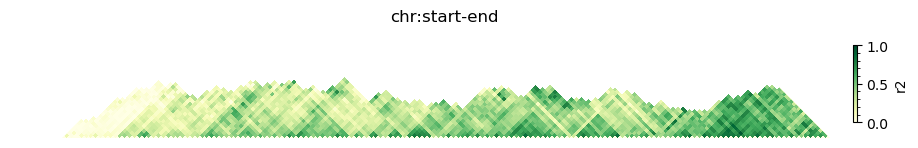

In [ ]:



fig, ax = plt.subplots(figsize=(14, 4))  # Increase figure size for better visibility

# Define the rotation transform
rotation = Affine2D().rotate_deg(-45)

# Apply the transform to the image
corr_min = hmdata.corr(min_periods=30)
corr_min = corr_min**2

# Apply upper triangular mask
mask = np.tril(np.ones(corr_min.shape, dtype=bool), k=-1)
# Set diagonal or lower-triangular elements to NaN for visualization
masked_corr = corr_min.mask(mask)
np.fill_diagonal(masked_corr.values, 0)



data = masked_corr#.iloc[:15,:15]
im = ax.imshow(
    data, 
    cmap='YlGn', 
    vmin=0, 
    vmax=1, 
    clip_on=True,
    transform=rotation + ax.transData, 
    interpolation='none'
)
rows, cols = data.shape
ax.set_xlim(-cols / 10 , cols * 1.5)
ax.set_ylim(0, -rows / 5)
ax.set_axis_off()
cbar = fig.colorbar(
    im, 
    ax=ax, 
    label='r2',
    shrink=0.25,  
    orientation='vertical', 
    pad=0.05, 
    anchor=(-0.5, 0.5)
)
cbar.minorticks_on()
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
ax.set_title(f'{region}')
plt.show()